# Dataset Information
Competition: https://www.kaggle.com/competitions/playground-series-s4e2/overview
Origin Dataset: https://www.kaggle.com/datasets/aravindpcoder/obesity-or-cvd-risk-classifyregressorcluster
Interesting: https://rstudio-pubs-static.s3.amazonaws.com/872760_24a044829eda4ba68996628b3a9efb06.html


- FAVC - Frequent consumption of high caloric food
- FCVC - Frequency of consumption of vegetables
- NCP - Number of main meals
- CAEC - Consumption of food between meals
- CH20 - Consumption of water daily
- SCC - Calories consumption monitoring
- FAF - Physical activity frequency
- TUE - Time using technology devices 
- CALC - Consumption of alcohol
- MTRANS - Transportation used    


NObesity values are:
- Insufficient_Weight Less than 18.5
- Normal_Weight 18.5 to 24.9
- Overweight_Level_I 25.0 to 29.9
- Overweight_Level_II I 30.0 to 34.9
- Obesity_Type_I II 35.0 to 39.9
- Obesity_Type_II more than 40

# Goal of the  of this competition
To use various factors to predict obesity risk in individuals, which is related to cardiovascular disease. Good luck!

# Submission
Estimate NObeyesdad for every id.

In [529]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [530]:
# Load the data
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

In [531]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20758 non-null  int64  
 1   Gender                          20758 non-null  object 
 2   Age                             20758 non-null  float64
 3   Height                          20758 non-null  float64
 4   Weight                          20758 non-null  float64
 5   family_history_with_overweight  20758 non-null  object 
 6   FAVC                            20758 non-null  object 
 7   FCVC                            20758 non-null  float64
 8   NCP                             20758 non-null  float64
 9   CAEC                            20758 non-null  object 
 10  SMOKE                           20758 non-null  object 
 11  CH2O                            20758 non-null  float64
 12  SCC                             

In [532]:
# df_train.value_counts() # not usefull 

In [533]:
df_train.describe()

,id,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,20758.00000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000
mean,10378.50000,23.841804,1.700245,87.887768,2.445908,2.761332,2.029418,0.981747,0.616756
std,5992.46278,5.688072,0.087312,26.379443,0.533218,0.705375,0.608467,0.838302,0.602113
min,0.00000,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,5189.25000,20.000000,1.631856,66.000000,2.000000,3.000000,1.792022,0.008013,0.000000
50%,10378.50000,22.815416,1.700000,84.064875,2.393837,3.000000,2.000000,1.000000,0.573887
75%,15567.75000,26.000000,1.762887,111.600553,3.000000,3.000000,2.549617,1.587406,1.000000
max,20757.00000,61.000000,1.975663,165.057269,3.000000,4.000000,3.000000,3.000000,2.000000


In [534]:
pd.set_option('display.max_columns', None)
df_train.head(50)

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II
5,5,Male,18.128249,1.748524,51.552595,yes,yes,2.919751,3.000000,Sometimes,no,2.137550,no,1.930033,1.000000,Sometimes,Public_Transportation,Insufficient_Weight
6,6,Male,29.883021,1.754711,112.725005,yes,yes,1.991240,3.000000,Sometimes,no,2.000000,no,0.000000,0.696948,Sometimes,Automobile,Obesity_Type_II
7,7,Male,29.891473,1.750150,118.206565,yes,yes,1.397468,3.000000,Sometimes,no,2.000000,no,0.598655,0.000000,Sometimes,Automobile,Obesity_Type_II
8,8,Male,17.000000,1.700000,70.000000,no,yes,2.000000,3.000000,Sometimes,no,3.000000,yes,1.000000,1.000000,no,Public_Transportation,Overweight_Level_I
9,9,Female,26.000000,1.638836,111.275646,yes,yes,3.000000,3.000000,Sometimes,no,2.632253,no,0.000000,0.218645,Sometimes,Public_Transportation,Obesity_Type_III


In [535]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13840 entries, 0 to 13839
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              13840 non-null  int64  
 1   Gender                          13840 non-null  object 
 2   Age                             13840 non-null  float64
 3   Height                          13840 non-null  float64
 4   Weight                          13840 non-null  float64
 5   family_history_with_overweight  13840 non-null  object 
 6   FAVC                            13840 non-null  object 
 7   FCVC                            13840 non-null  float64
 8   NCP                             13840 non-null  float64
 9   CAEC                            13840 non-null  object 
 10  SMOKE                           13840 non-null  object 
 11  CH2O                            13840 non-null  float64
 12  SCC                             

In [536]:
df_test.describe()

,id,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,13840.000000,13840.000000,13840.000000,13840.000000,13840.000000,13840.000000,13840.000000,13840.000000,13840.000000
mean,27677.500000,23.952740,1.698934,87.384504,2.442898,2.750610,2.032044,0.974532,0.611033
std,3995.408198,5.799814,0.088761,26.111819,0.531606,0.710927,0.611230,0.840361,0.608005
min,20758.000000,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,24217.750000,20.000000,1.631662,65.000000,2.000000,3.000000,1.771781,0.001086,0.000000
50%,27677.500000,22.906342,1.700000,83.952968,2.358087,3.000000,2.000000,1.000000,0.552498
75%,31137.250000,26.000000,1.760710,111.157811,3.000000,3.000000,2.552388,1.571865,1.000000
max,34597.000000,61.000000,1.980000,165.057269,3.000000,4.000000,3.000000,3.000000,2.000000


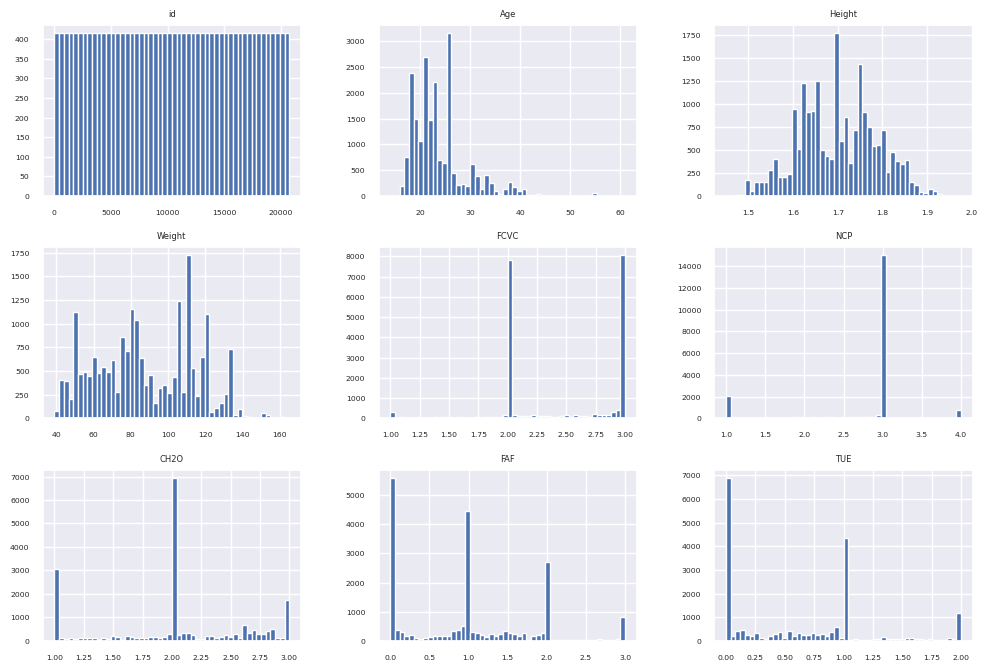

In [537]:
df_train.hist(bins=50, figsize=(12,8))
plt.show()

Feature Age could be scaled because of the slight left shift.

In [538]:
df_train['NObeyesdad'].nunique

<bound method IndexOpsMixin.nunique of 0        Overweight_Level_II
1              Normal_Weight
2        Insufficient_Weight
3           Obesity_Type_III
4        Overweight_Level_II
                ...         
20753        Obesity_Type_II
20754    Insufficient_Weight
20755        Obesity_Type_II
20756    Overweight_Level_II
20757        Obesity_Type_II
Name: NObeyesdad, Length: 20758, dtype: object>

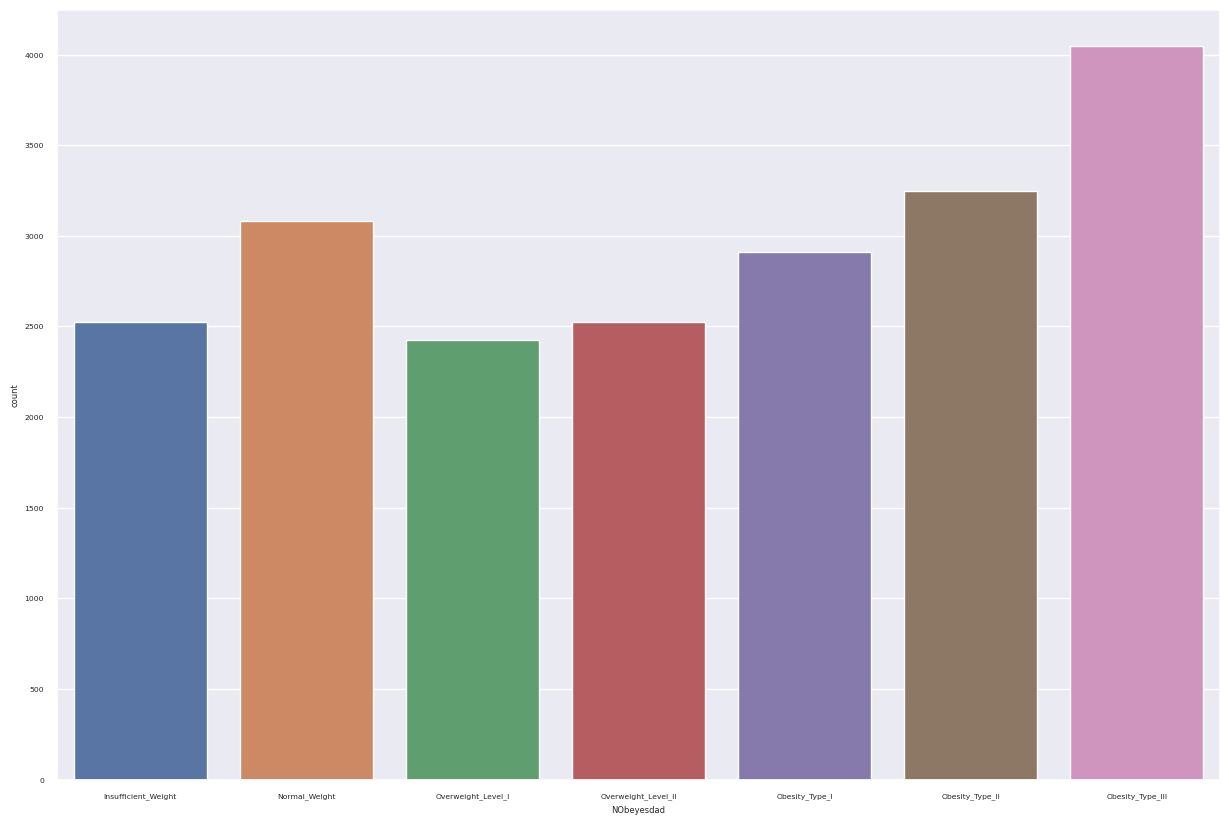

In [539]:
sns.set(font_scale=0.5)
plt.figure(figsize=(15, 10))
NObeyesdad_order= ['Insufficient_Weight', 'Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II', 'Obesity_Type_I', 'Obesity_Type_II' ,'Obesity_Type_III'] 
sns.countplot(data = df_train, x="NObeyesdad",order= NObeyesdad_order ) # There are not all even.
plt.show()

In [540]:
#sns.pairplot(df_train) # Our case its not usefull to use

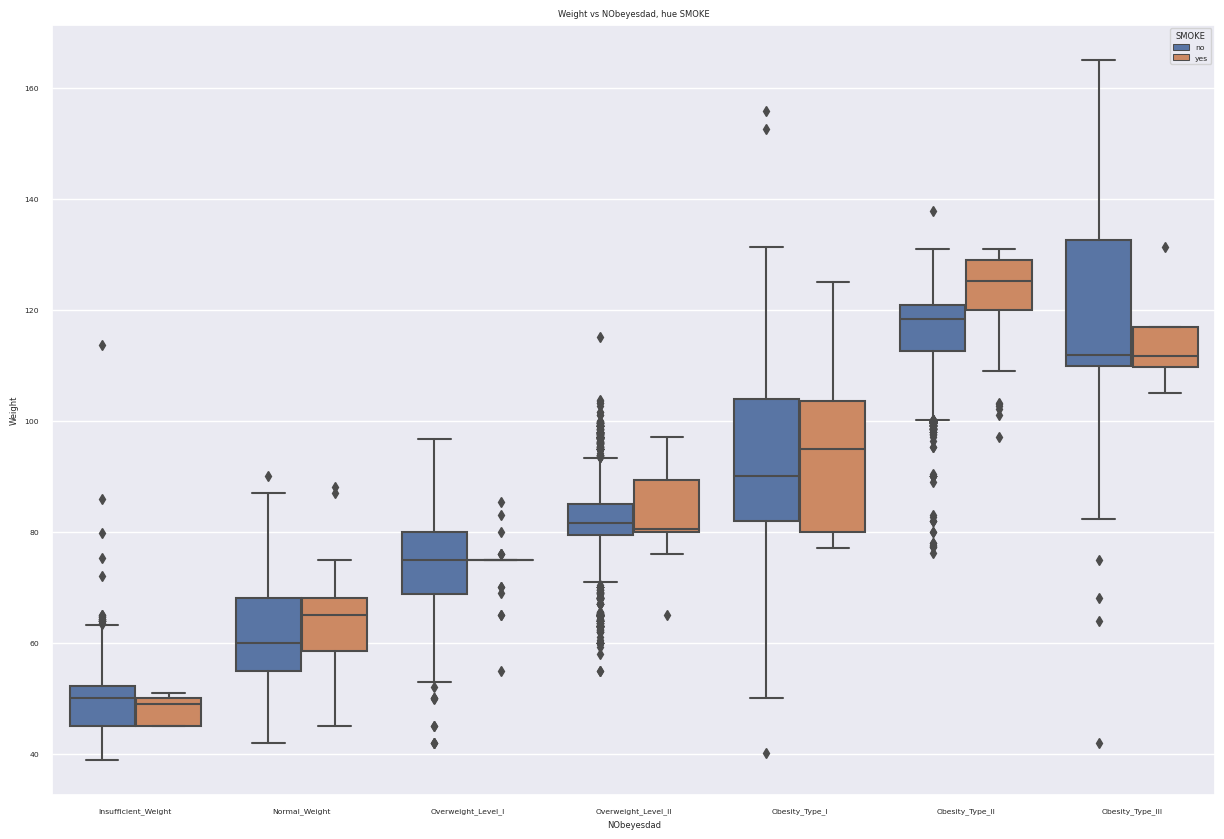

In [541]:
plt.figure(figsize=(15, 10))
sns.set(font_scale=0.5)
sns.boxplot(data = df_train, y="Weight", x="NObeyesdad", hue="SMOKE", order=NObeyesdad_order)
plt.title("Weight vs NObeyesdad, hue SMOKE")
plt.show()

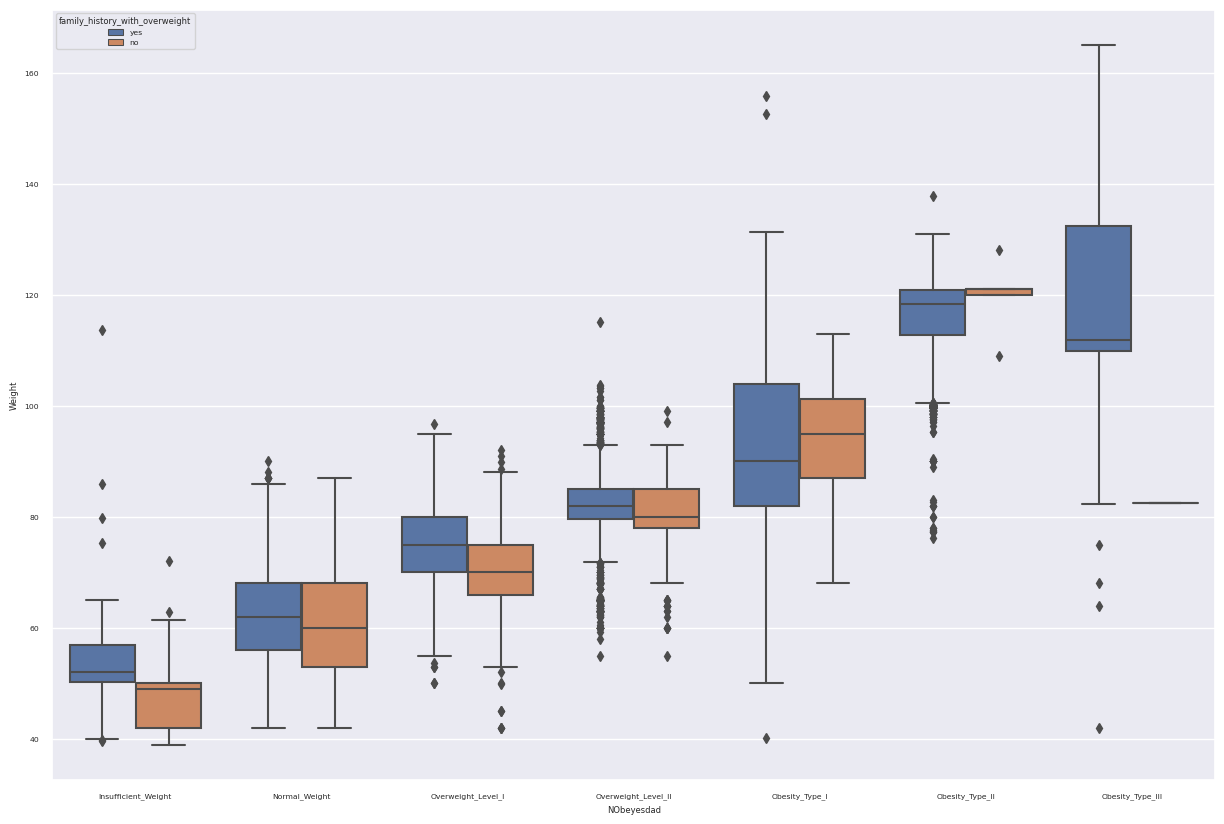

In [542]:
plt.figure(figsize=(15, 10))
sns.set(font_scale=0.5)
sns.boxplot(data = df_train, y="Weight", x="NObeyesdad", hue="family_history_with_overweight", order=NObeyesdad_order)
plt.show()

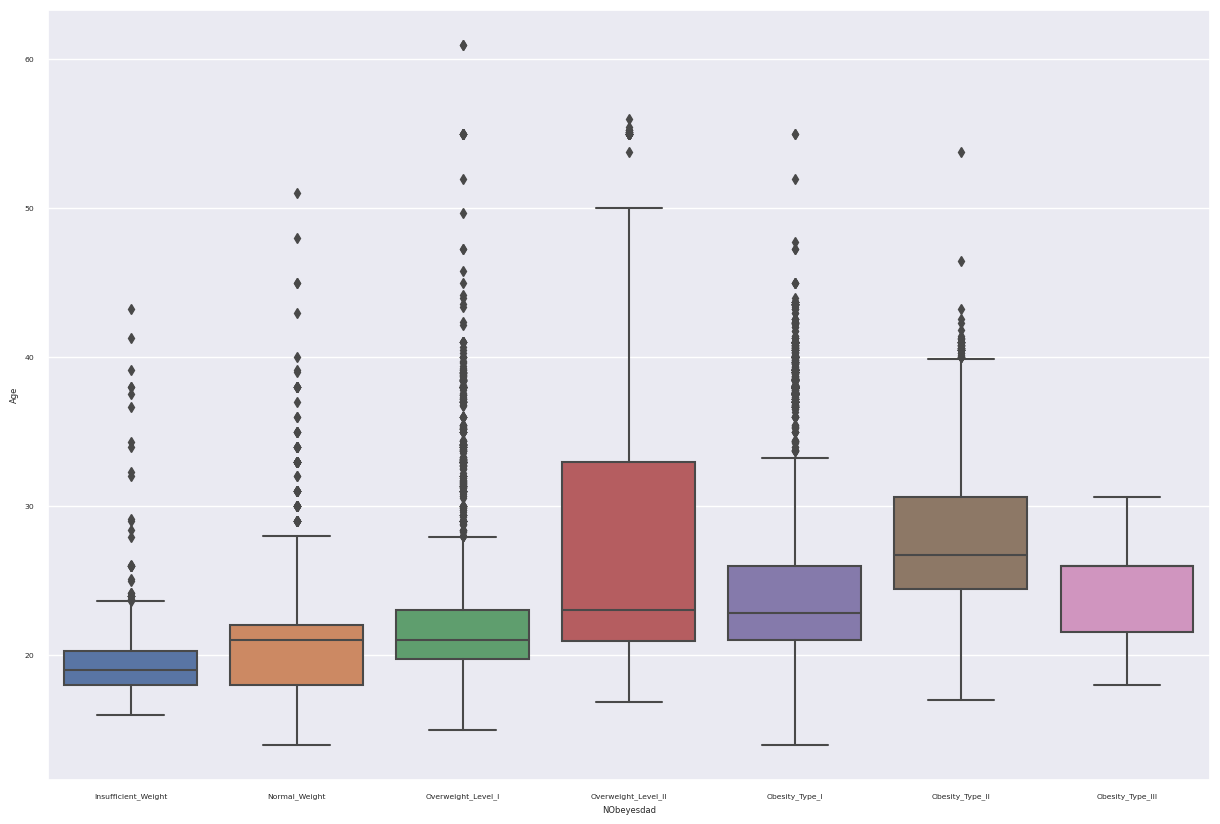

In [543]:
plt.figure(figsize=(15, 10))
sns.set(font_scale=0.5)
sns.boxplot(data = df_train, y="Age", x="NObeyesdad", order=NObeyesdad_order)
plt.show()

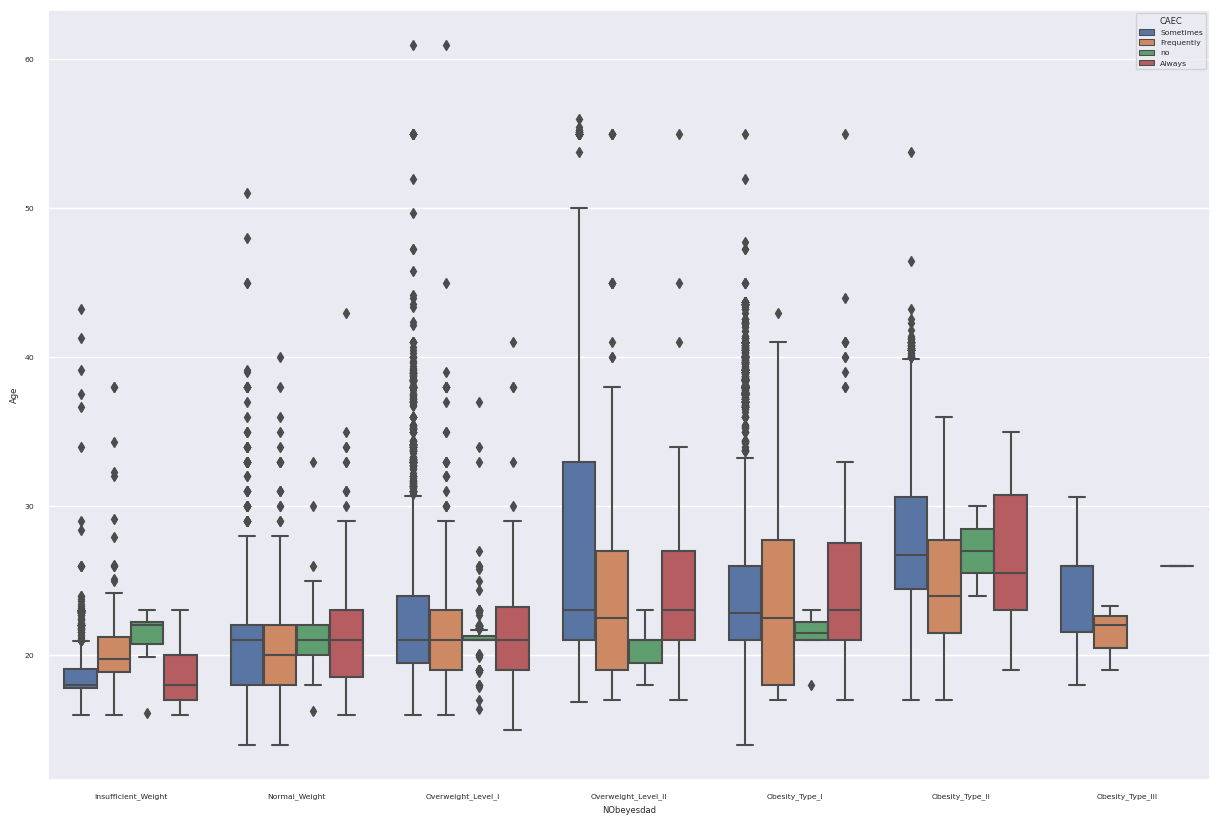

In [544]:
plt.figure(figsize=(15, 10))
sns.set(font_scale=0.5)
sns.boxplot(data = df_train, y="Age", x="NObeyesdad", hue="CAEC", order=NObeyesdad_order)
plt.show()

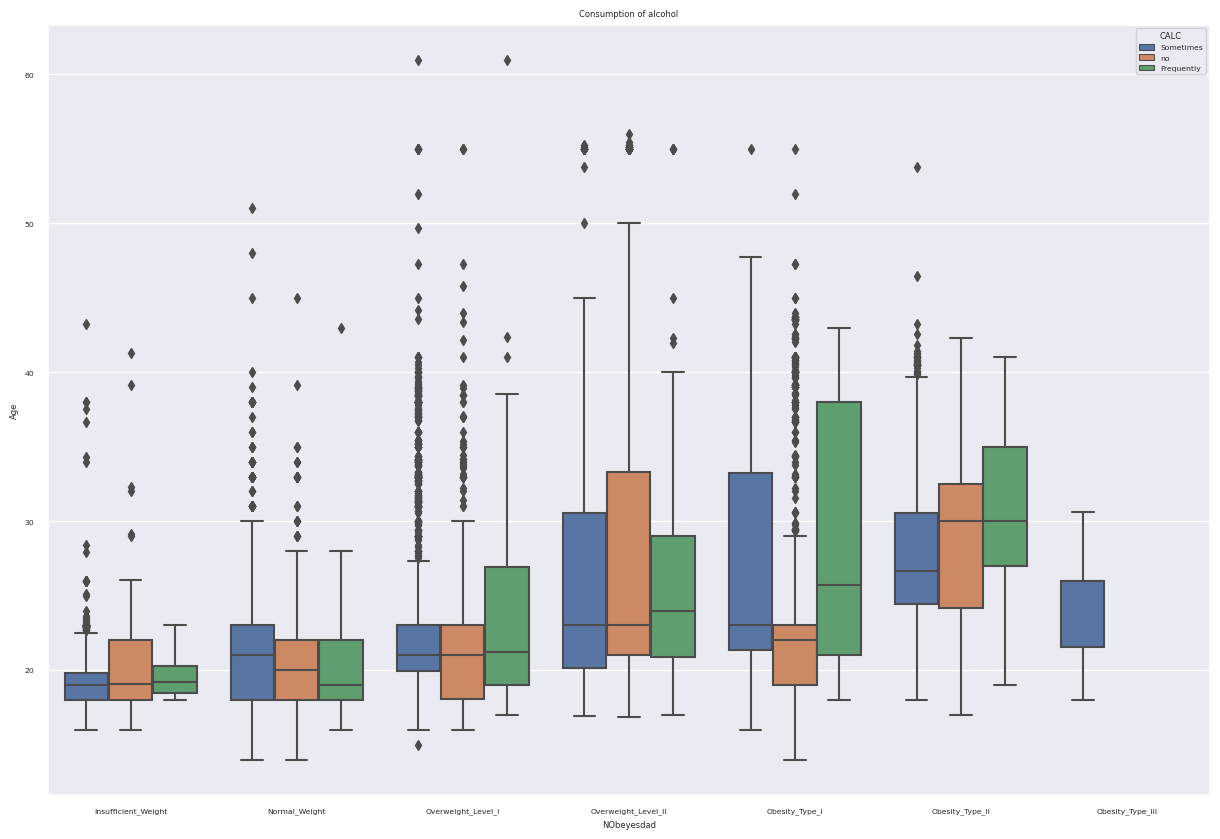

In [545]:
plt.figure(figsize=(15, 10))
sns.set(font_scale=0.5)
sns.boxplot(data = df_train, y="Age", x="NObeyesdad", hue="CALC", order=NObeyesdad_order)
plt.title("Consumption of alcohol")
plt.show()

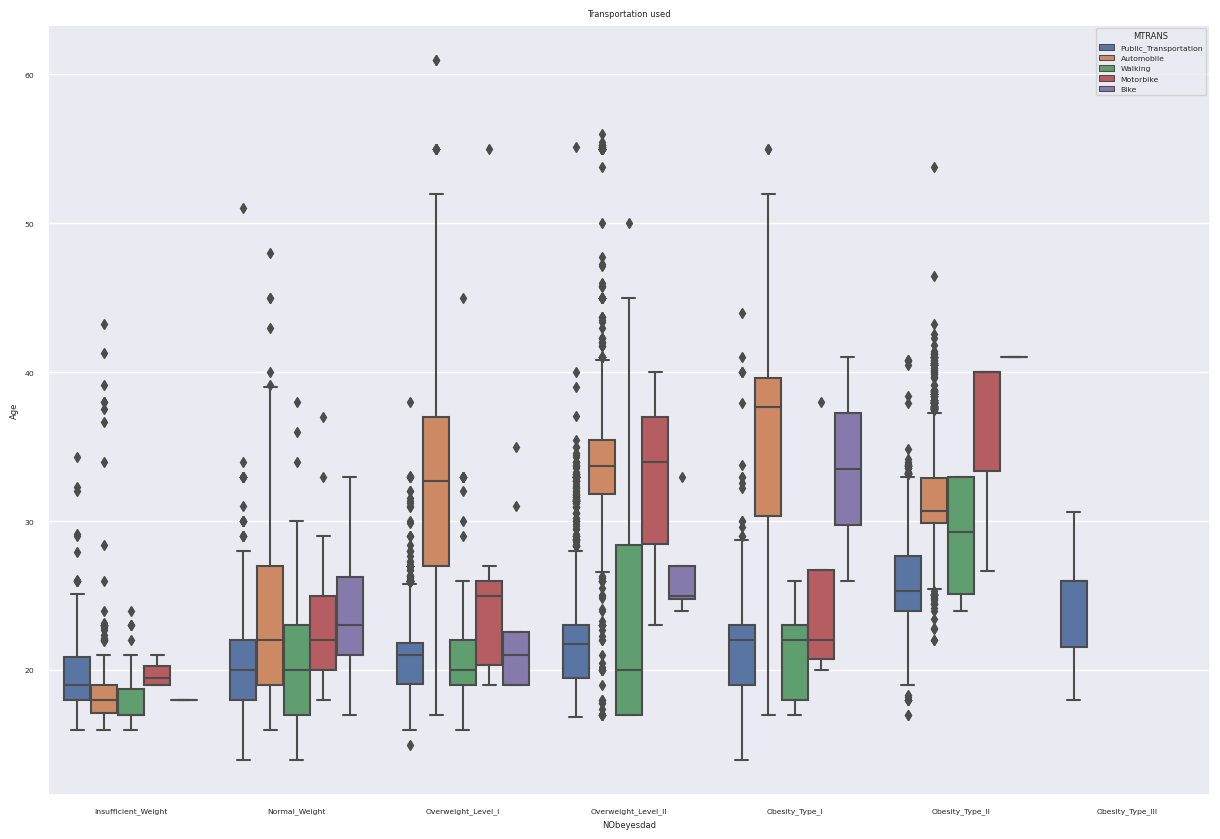

In [546]:
plt.figure(figsize=(15, 10))
sns.set(font_scale=0.5)
sns.boxplot(data = df_train, y="Age", x="NObeyesdad", hue="MTRANS", order=NObeyesdad_order)
plt.title("Transportation used")
plt.show()

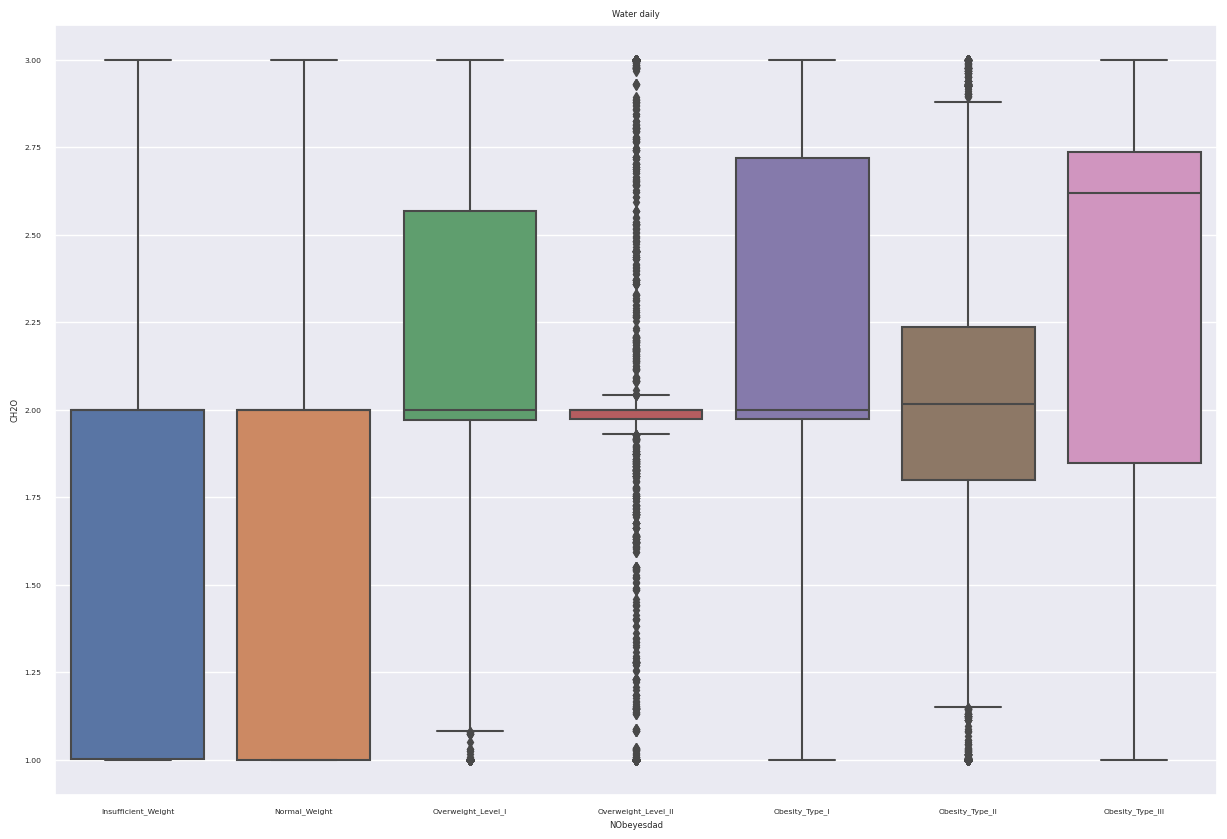

In [548]:
plt.figure(figsize=(15, 10))
sns.set(font_scale=0.5)
sns.boxplot(data = df_train, y="CH2O", x="NObeyesdad", order=NObeyesdad_order)
plt.title("Water daily")
plt.show()


# Corr Matrix

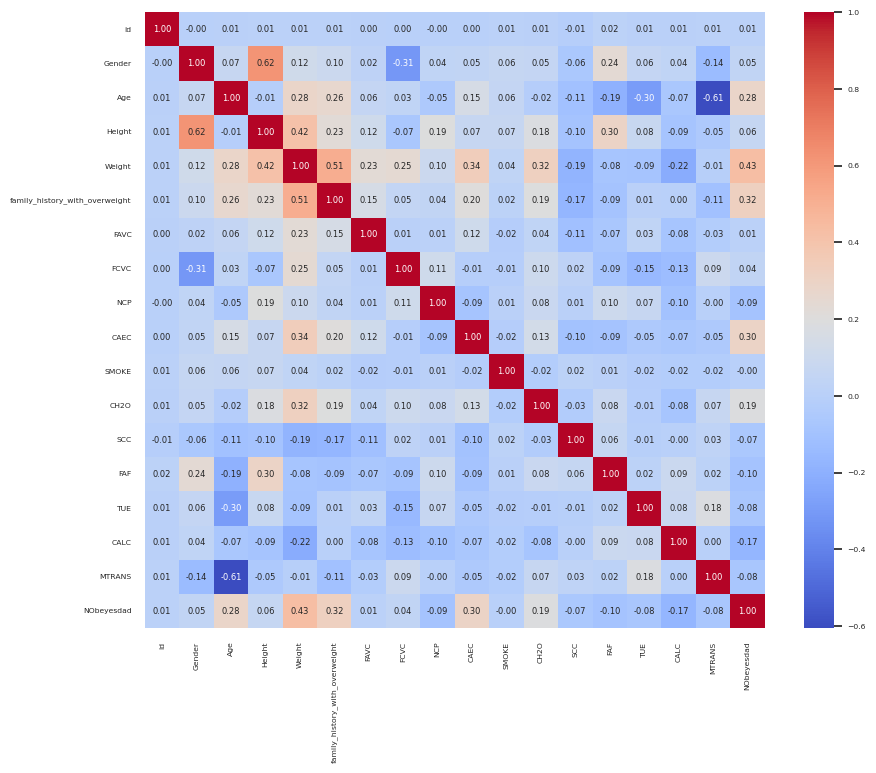

In [ ]:
def encode_categorical_columns(df):
    label_encoders = {}
    for column in df.select_dtypes(include=['object', 'category']).columns:
        encoder = LabelEncoder()
        df[column] = encoder.fit_transform(df[column].astype(str))
        label_encoders[column] = encoder
    return df, label_encoders

def calculate_and_plot_correlation(df):
    # Kodiert kategoriale Spalten
    df_encoded, _ = encode_categorical_columns(df)
    
    # Berechnet die Korrelation
    corr = df_encoded.corr()
    
    # Erstellt eine Heatmap zur Visualisierung der Korrelationsmatrix
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
    plt.show()



# Berechnen und visualisieren Sie die Korrelation
calculate_and_plot_correlation(df_train)

There are a high correlation to nObeyesdad:
- Age 
- Weight
- family_history_with_overweight
- CAEC, Consumption of foods between meals
- CH2O, Consumption of water daily (Not so much like the other)

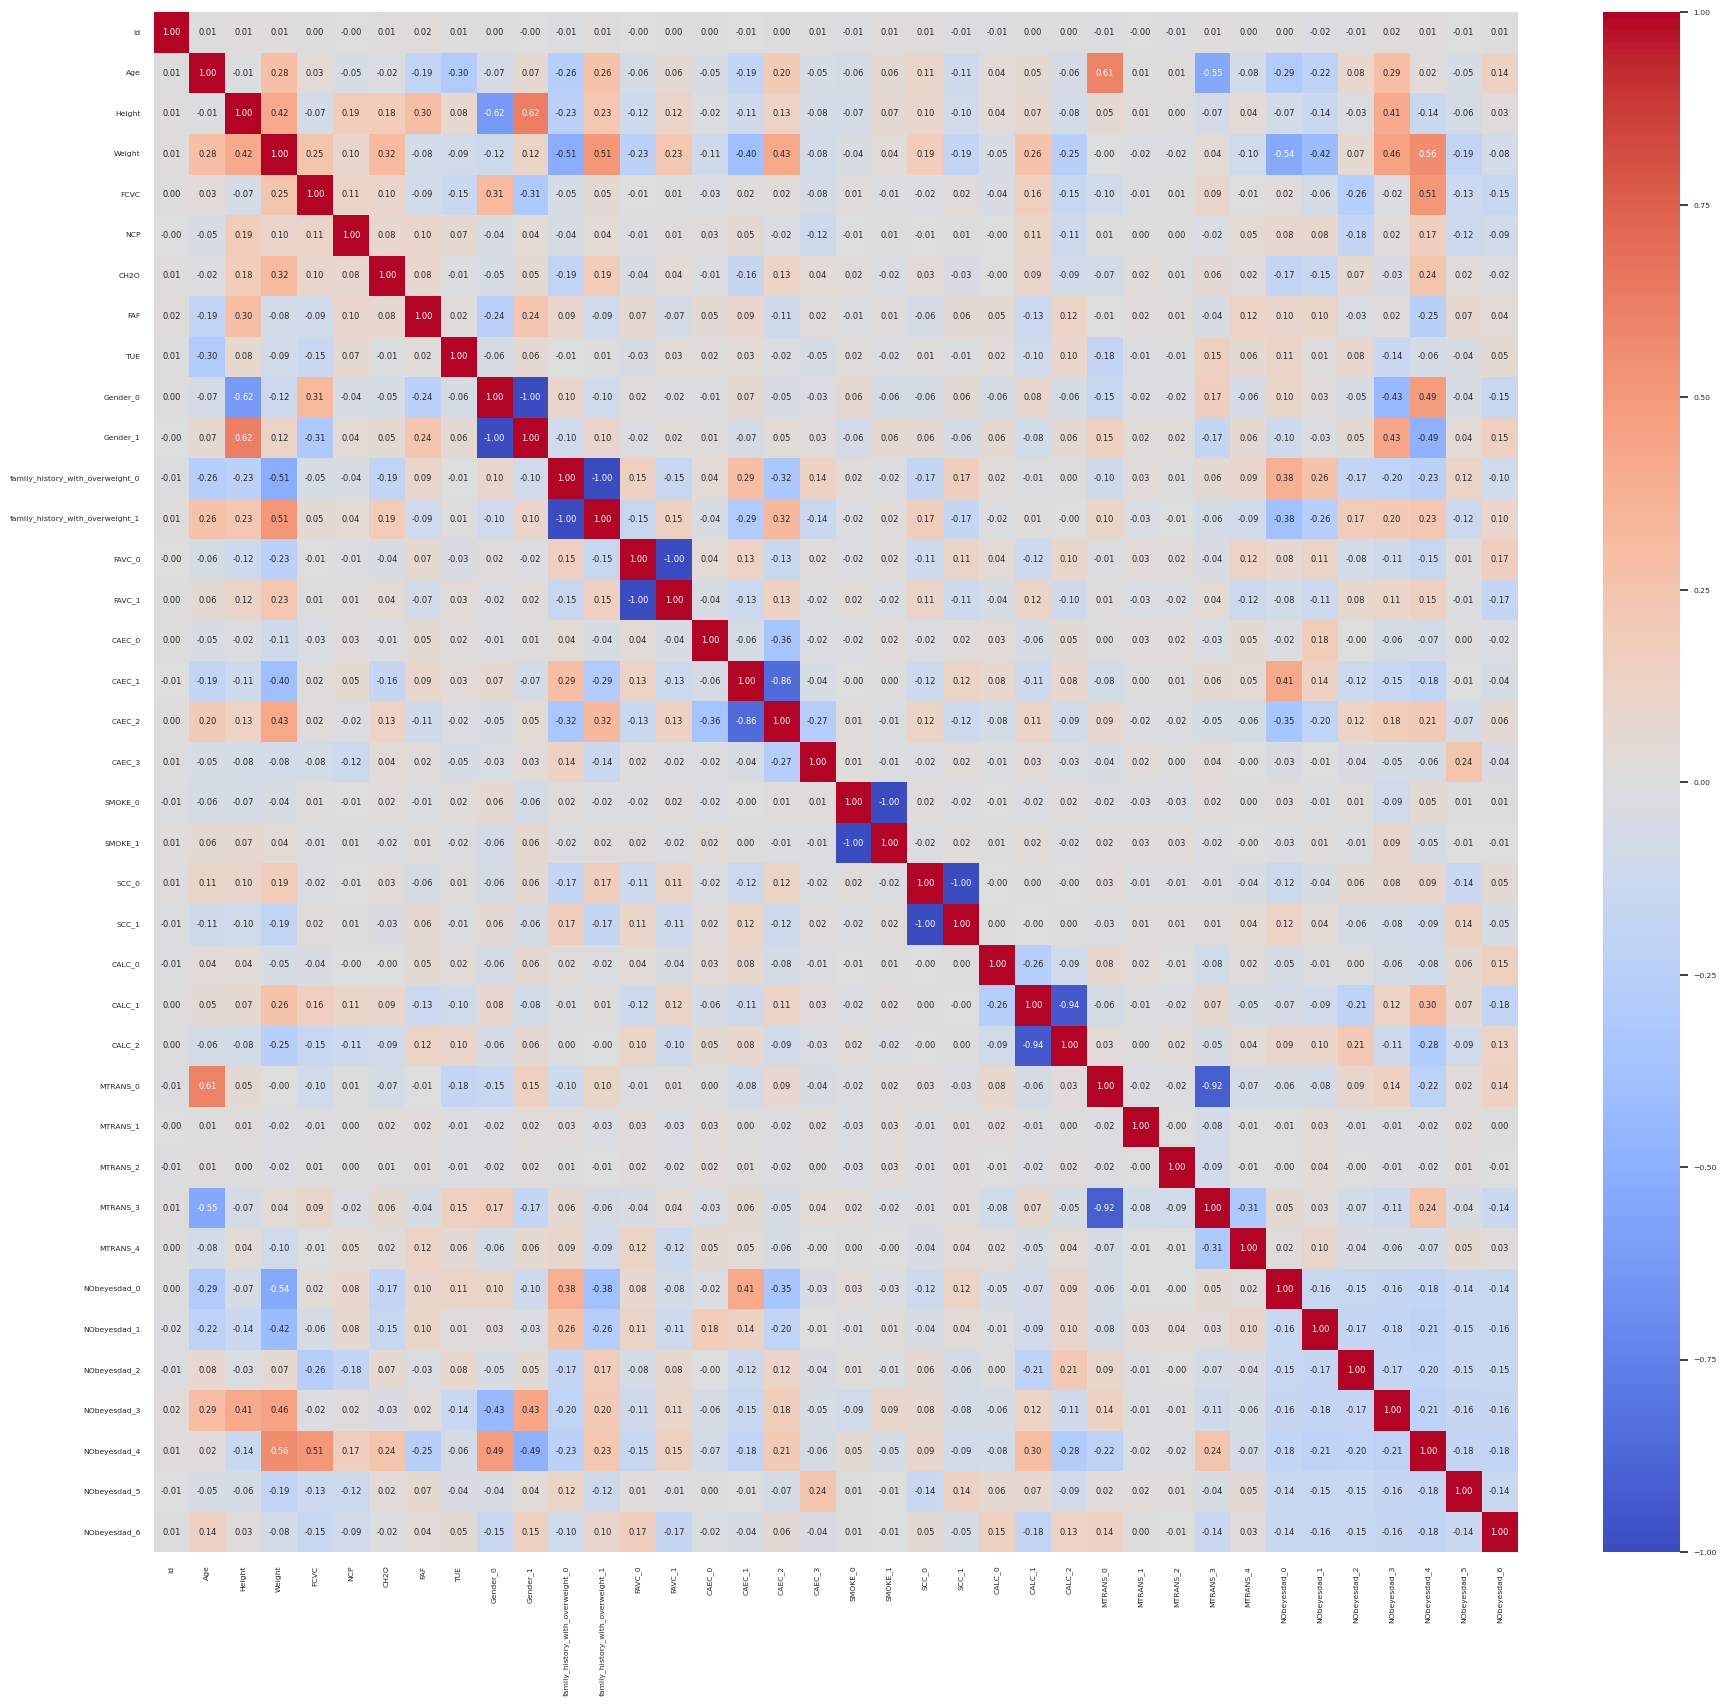

In [ ]:
# big correlation matrix 
df_with_dummies = pd.get_dummies(df_train, columns=['Gender','family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS', 'NObeyesdad'])
corr_with_dummies = df_with_dummies.corr()
plt.figure(figsize=(22 , 20))
sns.heatmap(corr_with_dummies, annot=True, fmt=".2f", cmap='coolwarm')
plt.show()